## Data Format

### 三维点云 Point Cloud

模型输入的数据格式是：$P: N \times 6$，$N$表示点的个数，每个点包含6个属性，分别是：$x, y, z, r, g, b$。其中，$x, y, z$是点的坐标，$r, g, b$是点的颜色（范围是0-255）（另外，原数据中还包含了alpha，表示颜色的不透明度）。

In [3]:
from plyfile import PlyData, PlyElement
import numpy as np

ply_file = '../temp/data/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.ply'
ply = PlyData.read(ply_file)
ply

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar'), PlyProperty('alpha', 'uchar')), count=81369, comments=[]), PlyElement('face', (PlyListProperty('vertex_indices', 'uchar', 'int'),), count=153587, comments=[])), text=False, byte_order='<', comments=['VCGLIB generated'], obj_info=[])

In [4]:
ply_data = ply['vertex'].data
points = np.array([[x, y, z, r, g, b] for x, y, z, r, g, b, a in ply_data])
points

array([[5.3242141e-01, 4.5172734e+00, 2.6304942e-01, 1.0100000e+02,
        1.0700000e+02, 9.0000000e+01],
       [5.3404164e-01, 4.5520892e+00, 2.6230201e-01, 8.8000000e+01,
        8.3000000e+01, 7.8000000e+01],
       [5.4477900e-01, 4.4811263e+00, 1.7396316e-01, 3.9000000e+01,
        3.9000000e+01, 3.5000000e+01],
       ...,
       [7.5318260e+00, 4.8856416e+00, 2.5779479e+00, 2.4200000e+02,
        2.1200000e+02, 1.4400000e+02],
       [7.5255036e+00, 4.9194841e+00, 2.6109233e+00, 1.7500000e+02,
        1.6100000e+02, 1.2700000e+02],
       [7.5323153e+00, 4.8880706e+00, 2.6260881e+00, 1.7900000e+02,
        1.6400000e+02, 1.2800000e+02]], dtype=float32)

In [6]:
ply_file = '../temp/data/scannet/scans/scene0000_00/scene0000_00_vh_clean_2.labels.ply'
ply = PlyData.read(ply_file)
ply_data = ply['vertex'].data
points = np.array([[x, y, z, r, g, b, a, label] for x, y, z, r, g, b, a, label in ply_data])
points

array([[5.3242141e-01, 4.5172734e+00, 2.6304942e-01, ..., 1.4100000e+02,
        2.4000000e+02, 1.6000000e+01],
       [5.3404164e-01, 4.5520892e+00, 2.6230201e-01, ..., 1.4100000e+02,
        2.4000000e+02, 1.6000000e+01],
       [5.4477900e-01, 4.4811263e+00, 1.7396316e-01, ..., 1.4100000e+02,
        2.4000000e+02, 1.6000000e+01],
       ...,
       [7.5318260e+00, 4.8856416e+00, 2.5779479e+00, ..., 2.3200000e+02,
        2.5500000e+02, 1.0000000e+00],
       [7.5255036e+00, 4.9194841e+00, 2.6109233e+00, ..., 2.3200000e+02,
        2.5500000e+02, 1.0000000e+00],
       [7.5323153e+00, 4.8880706e+00, 2.6260881e+00, ..., 2.3200000e+02,
        2.5500000e+02, 1.0000000e+00]], dtype=float32)

### 体素化 Voxel

In [1]:
import numpy as np

def point_cloud_to_voxel(point_cloud, voxel_resolution):
    voxel_grid = np.zeros(voxel_resolution, dtype=np.int32)
    min_coords = np.min(point_cloud, axis=0)
    max_coords = np.max(point_cloud, axis=0)
    range_coords = max_coords - min_coords
    normalized_point_cloud = (point_cloud - min_coords) / range_coords * (voxel_resolution - 1)
    
    for point in normalized_point_cloud:
        x, y, z = point
        voxel_x = int(x)
        voxel_y = int(y)
        voxel_z = int(z)
        voxel_x = max(0, min(voxel_resolution[0] - 1, voxel_x))
        voxel_y = max(0, min(voxel_resolution[1] - 1, voxel_y))
        voxel_z = max(0, min(voxel_resolution[2] - 1, voxel_z))
        voxel_grid[voxel_x, voxel_y, voxel_z] = 1
    return voxel_grid


In [2]:
from plyfile import PlyData, PlyElement

ply_file = '../temp/data/scannet_part/scans/scene0000_00/scene0000_00_vh_clean_2.ply'
ply = PlyData.read(ply_file)
ply_data = ply['vertex'].data
points = np.array([[x, y, z] for x, y, z, r, g, b, a in ply_data])
points

array([[0.5324214 , 4.5172734 , 0.26304942],
       [0.53404164, 4.552089  , 0.262302  ],
       [0.544779  , 4.4811263 , 0.17396316],
       ...,
       [7.531826  , 4.8856416 , 2.5779479 ],
       [7.5255036 , 4.919484  , 2.6109233 ],
       [7.5323153 , 4.8880706 , 2.6260881 ]], dtype=float32)

In [19]:
# 假设point_cloud是一个Nx3的数组，其中包含点云的坐标
voxel_resolution = (132, 132, 116)  # 设置体素分辨率
voxel_data = point_cloud_to_voxel(points, np.array(voxel_resolution))
voxel_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
voxel_data.shape

(132, 132, 116)

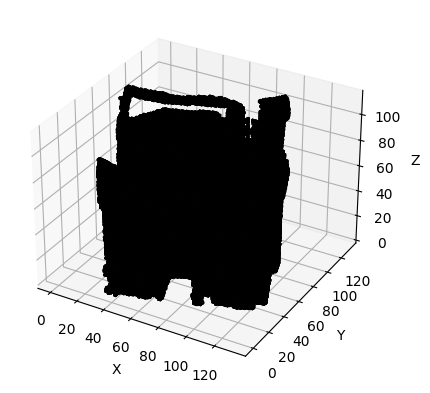

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_voxels(voxels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    dims = voxels.shape
    # 绘制体素
    ax.voxels(voxels, edgecolor='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# 假设voxel_data是体素化后的数据
visualize_voxels(voxel_data)